In [90]:
import numpy as np
import matplotlib.pyplot as plt
import qrcode
from PIL import Image

In [112]:

def generate_watermark(data,secret,quant=16,size=(100,100)):
    dist  = [0 if i==0 else int(i*256/quant)-1 for i in range(quant+1)]
    np.random.seed(abs(hash(data+secret))%2**32)
    p=np.random.choice([i*quant for i in range(quant)], size = quant+1)
    p=p/p.sum()
    watermark = np.random.choice(dist,size=size,p=p)
    return watermark.astype('uint8')

In [113]:
SECRET="rahasia"
def make_secureQR(data:str,secret:str=SECRET,                  
                  pct_wm_size:int=0.4, 
                  bx_size:int=10,
                  border:int=4,
                  qr_ver:int=None,
                  **kwargs)-> np.ndarray:

    img = qrcode.make(data,version=qr_ver, box_size=bx_size, border=border, error_correction=qrcode.constants.ERROR_CORRECT_H)
    img = np.asanyarray(img).astype('uint8')*255
    
    wm_size = (img.shape[0]//bx_size - 2*border) * pct_wm_size
    wm_size = int(wm_size)
    if not wm_size%2==0: wm_size-=1 

    wm_size *= bx_size
    size = (wm_size,wm_size)
    watermark = generate_watermark(data,secret,size=size,**kwargs)
    wm = np.pad(watermark, bx_size//2, constant_values=255)

    # add border watermark 8
    length = wm.shape[0] 
    loc = img.shape[0]//2 - length//2
    img[loc:loc+length,loc:loc+length]= wm
    return img, watermark

In [120]:
# generate batch of images
import pathlib
import numpy as np
from pathlib import Path

def generate_batch(path):
    path =Path(path)
    rows = []
    for i in range(100): 
        print(i,end=' ')
        for j in range(2):
            col = []
            for k in range(5):
                img,wtm = make_secureQR(f'data_{i+1:03}',qr_ver = 3, quant=16)
                col.append(img)
            rows.append(np.hstack(col))
        if (i+1)%4 ==0:
            rows.append(np.ones((10,rows[0].shape[1]),dtype='uint8'))
            grid = np.vstack(rows)

            Image.fromarray(grid).save(path/f"{i-2:03}_{i+1}.pdf")
            rows=[]

In [121]:
generate_batch("watermark")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

KeyboardInterrupt: 

(100, 100)


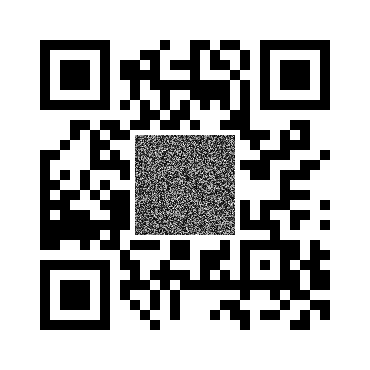

In [115]:
img,wtm = make_secureQR("halo0001", qr_ver = 3, quant=16)
im = Image.fromarray(img)
print(wtm.shape)
im

(array([1565., 1270., 1196.,  679.,  599.,  340.,  156., 1048.,  731.,
         338.,  765., 1013.,   83.,  145.,    0.,   72.]),
 array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    ]),
 <BarContainer object of 16 artists>)

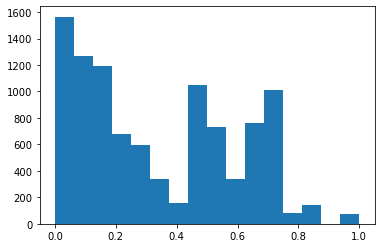

In [116]:
# All watermark
plt.hist(wtm.ravel()/wtm.max(),bins=16)


(array([395., 296., 305., 170., 140.,  88.,  41., 258., 164.,  82., 204.,
        279.,  18.,  37.,   0.,  23.]),
 array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    ]),
 <BarContainer object of 16 artists>)

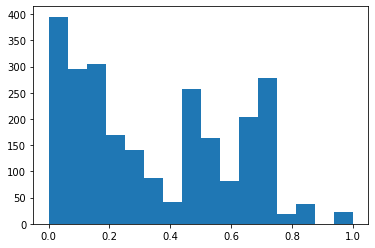

In [117]:
# subset watermark
c = wtm.shape[0]//2
idx = slice(c-25,c+25)
_wtm = wtm[idx,idx]

plt.hist(_wtm.ravel()/_wtm.max(),bins=16)


# Old Code

In [11]:
from PIL import Image
im = Image.fromarray(img)
im.save('qr1.pdf')

In [18]:
# 1 inch = 25.4 mm
img.shape[0]

370

In [33]:
p = 370//2-50
imm = img[p:p+100,p:p+100]

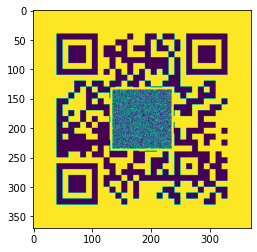

In [32]:
plt.imshow(img)

(array([1565., 1270., 1196.,  679.,  599.,  340.,  156., 1048.,  731.,
         338.,  765., 1013.,   83.,  145.,    0.,   72.]),
 array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    ]),
 <BarContainer object of 16 artists>)

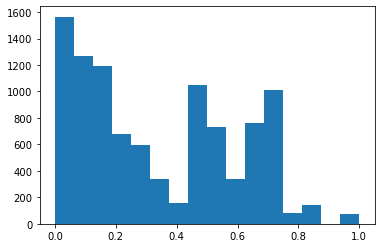

In [34]:
plt.hist(imm.ravel()/imm.max(),bins=16)

(array([57., 48., 46., 28., 27., 14.,  7., 46., 30., 11., 32., 41.,  2.,
         9.,  0.,  2.]),
 array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    ]),
 <BarContainer object of 16 artists>)

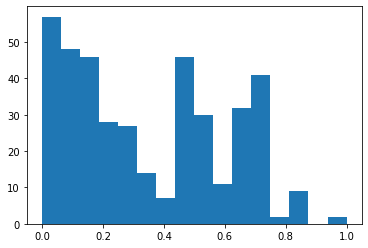

In [35]:
sub = imm[40:-40,40:-40]
plt.hist(sub.ravel()/sub.max(),bins=16)
